CÂU 1

In [ ]:
from PIL import Image

img = Image.open('./XLA_lab1/exercise/baby.jpeg').convert('RGB')
r, g, b = img.split()
red_img = Image.merge('RGB', (r, Image.new('L', r.size), Image.new('L', r.size)))
red_img.save('./XLA_lab1/red.jpg')

green_img = Image.merge('RGB', (Image.new('L', g.size), g, Image.new('L', g.size)))
green_img.save('./XLA_lab1/green.jpg')

blue_img = Image.merge('RGB', (Image.new('L', b.size), Image.new('L', b.size), b))
blue_img.save('./XLA_lab1/blue.jpg')


CÂU 2

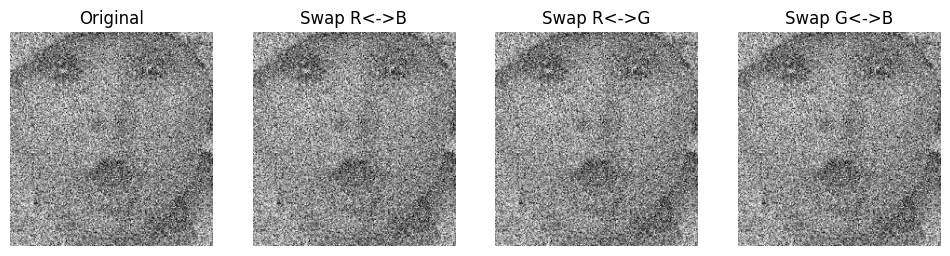

In [15]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = iio.imread('./XLA_lab1/exercise/baby.jpeg')

swapped_rb = img.copy()
swapped_rb[:, :, [0, 2]] = swapped_rb[:, :, [2, 0]]

swapped_rg = img.copy()
swapped_rg[:, :, [0, 1]] = swapped_rg[:, :, [1, 0]]

swapped_gb = img.copy()
swapped_gb[:, :, [1, 2]] = swapped_gb[:, :, [2, 1]]

iio.imwrite('./XLA_lab1/swapped_rb.jpg', swapped_rb)
iio.imwrite('./XLA_lab1/swapped_rg.jpg', swapped_rg)
iio.imwrite('./XLA_lab1/swapped_gb.jpg', swapped_gb)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(swapped_rb)
plt.title('Swap R<->B')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(swapped_rg)
plt.title('Swap R<->G')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(swapped_gb)
plt.title('Swap G<->B')
plt.axis('off')

plt.show()

CÂU 3

In [16]:
import numpy as np
import imageio.v2 as iio
import colorsys

img = iio.imread('./XLA_lab1/exercise/flower.jpeg')
img = img / 255.0 
hsv_img = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        hsv_img[i, j] = [h, s, v]

H = hsv_img[:, :, 0]
S = hsv_img[:, :, 1]
V = hsv_img[:, :, 2]

H_img = (H * 255).astype(np.uint8)
S_img = (S * 255).astype(np.uint8)
V_img = (V * 255).astype(np.uint8)

iio.imwrite('./XLA_lab1/hue.jpg', H_img)
iio.imwrite('./XLA_lab1/saturation.jpg', S_img)
iio.imwrite('./XLA_lab1/value.jpg', V_img)

CÂU 4

In [17]:
import numpy as np
import imageio.v2 as iio
import colorsys

img = iio.imread('./XLA_lab1/exercise/baby.jpeg') / 255.0

hsv_img = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)

        h_new = 1/3
        v_new = 0.75 * v
        hsv_img[i, j] = [h_new, s, v_new]

rgb_new = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        h, s, v = hsv_img[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        rgb_new[i, j] = [r, g, b]

rgb_new_img = (rgb_new * 255).astype(np.uint8)
iio.imwrite('./XLA_lab1/hsv_modified.jpg', rgb_new_img)

CÂU 5

In [18]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os

folder = './XLA_lab1/exercise'
output_folder = './XLA_lab1/mean_filtered'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
        img_path = os.path.join(folder, filename)
        img = iio.imread(img_path)

        if img.ndim == 3:
            filtered = np.zeros_like(img)
            for c in range(3):
                filtered[:, :, c] = sn.uniform_filter(img[:, :, c], size=3)
        else:
            filtered = sn.uniform_filter(img, size=3)
        save_path = os.path.join(output_folder, f'mean_{filename}')
        iio.imwrite(save_path, filtered)
        print(f'Đã lưu: {save_path}')

Đã lưu: ./XLA_lab1/mean_filtered/mean_flower.jpeg
Đã lưu: ./XLA_lab1/mean_filtered/mean_balloons_noisy.png
Đã lưu: ./XLA_lab1/mean_filtered/mean_baby.jpeg


CÂU 6

In [1]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os

folder = './XLA_lab1/exercise'
output_folder = './XLA_lab1/denoise'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
        img_path = os.path.join(folder, filename)
        img = iio.imread(img_path)
        
        # Nếu ảnh màu, áp dụng filter cho từng kênh
        if img.ndim == 3:
            mean = np.zeros_like(img)
            median = np.zeros_like(img)
            gaussian = np.zeros_like(img)
            for c in range(3):
                mean[:, :, c] = sn.uniform_filter(img[:, :, c], size=3)
                median[:, :, c] = sn.median_filter(img[:, :, c], size=3)
                gaussian[:, :, c] = sn.gaussian_filter(img[:, :, c], sigma=1)
        else:
            mean = sn.uniform_filter(img, size=3)
            median = sn.median_filter(img, size=3)
            gaussian = sn.gaussian_filter(img, sigma=1)
        
        # Lưu ảnh đã lọc
        iio.imwrite(os.path.join(output_folder, f'mean_{filename}'), mean)
        iio.imwrite(os.path.join(output_folder, f'median_{filename}'), median)
        iio.imwrite(os.path.join(output_folder, f'gaussian_{filename}'), gaussian)
        print(f'Đã lưu: mean_{filename}, median_{filename}, gaussian_{filename}')

Đã lưu: mean_flower.jpeg, median_flower.jpeg, gaussian_flower.jpeg
Đã lưu: mean_balloons_noisy.png, median_balloons_noisy.png, gaussian_balloons_noisy.png
Đã lưu: mean_baby.jpeg, median_baby.jpeg, gaussian_baby.jpeg


CÂU7

In [3]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pyplot as plt
import os
import glob

input_folder = 'Exercise'
output_folder = 'Exercise_Edges'
os.makedirs(output_folder, exist_ok=True)

image_paths = glob.glob(os.path.join(input_folder, '*'))

for img_path in image_paths:
    img = iio.imread(img_path, as_gray=True)
    
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)

    denoised = sn.gaussian_filter(img, sigma=1)

    edges = filters.sobel(denoised)

    edges_uint8 = (edges / edges.max() * 255).astype(np.uint8)

    base_name = os.path.basename(img_path)
    save_path = os.path.join(output_folder, f'edge_{base_name}')
    
    iio.imwrite(save_path, edges_uint8)

print("Đã xử lý xong tất cả ảnh.")


Đã xử lý xong tất cả ảnh.


CÂU 8

In [4]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os
import glob

input_folder = 'Exercise'
output_folder = 'Exercise_RandomRGB'
os.makedirs(output_folder, exist_ok=True)

image_paths = glob.glob(os.path.join(input_folder, '*'))

for img_path in image_paths:
    img = iio.imread(img_path)
    
    if img.ndim == 3:
        denoised = np.zeros_like(img)
        for c in range(3):
            denoised[:, :, c] = sn.gaussian_filter(img[:, :, c], sigma=1)
    else:
        denoised = sn.gaussian_filter(img, sigma=1)
    
    if denoised.ndim == 3 and denoised.shape[2] == 3:
        order = np.random.permutation([0, 1, 2])
        random_rgb = denoised[:, :, order]
    else:
        random_rgb = denoised 
    
    base_name = os.path.basename(img_path)
    save_path = os.path.join(output_folder, f'randomRGB_{base_name}')
    iio.imwrite(save_path, random_rgb.astype(np.uint8))

print("Đã xử lý xong tất cả ảnh.")

Đã xử lý xong tất cả ảnh.


CÂU 9

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os
import glob
import colorsys

input_folder = 'Exercise'
output_folder = 'Exercise_RandomHSV'
os.makedirs(output_folder, exist_ok=True)

image_paths = glob.glob(os.path.join(input_folder, '*'))

# Tạo danh sách các hoán vị không trùng nhau cho số ảnh
from itertools import permutations
perm_list = list(permutations([0, 1, 2]))
np.random.shuffle(perm_list)
assert len(perm_list) >= len(image_paths), "Số ảnh vượt quá số hoán vị kênh HSV!"

for idx, img_path in enumerate(image_paths):
    img = iio.imread(img_path)
    
    if img.ndim == 3:
        denoised = np.zeros_like(img)
        for c in range(3):
            denoised[:, :, c] = sn.gaussian_filter(img[:, :, c], sigma=1)
    else:
        denoised = sn.gaussian_filter(img, sigma=1)
    
    if denoised.ndim == 3 and denoised.shape[2] == 3:

        img_norm = denoised / 255.0
        hsv_img = np.zeros_like(img_norm)
        for i in range(img_norm.shape[0]):
            for j in range(img_norm.shape[1]):
                hsv_img[i, j] = colorsys.rgb_to_hsv(*img_norm[i, j])

        perm = perm_list[idx]
        hsv_permuted = hsv_img[:, :, perm]

        rgb_new = np.zeros_like(hsv_permuted)
        for i in range(hsv_permuted.shape[0]):
            for j in range(hsv_permuted.shape[1]):
                rgb_new[i, j] = colorsys.hsv_to_rgb(*hsv_permuted[i, j])
        rgb_new = (rgb_new * 255).astype(np.uint8)
    else:
        rgb_new = denoised
    
    base_name = os.path.basename(img_path)
    save_path = os.path.join(output_folder, f'randomHSV_{base_name}')
    iio.imwrite(save_path, rgb_new)

print("Đã xử lý xong tất cả ảnh.")